# Mid-semester assignment Part 1 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please upload it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1: shahar itzhaki 211492277

Student 2: roi tzadok 212136618

## Fashion MNIST
Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>



Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

<br>

# Goodluck!

#Neural Network in plain NumPy

## Import Libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

## Load Dataset

In [2]:
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


## Data preprocessing (10%)

### Feature scaling

In [3]:
examples = y.shape[0]
y1 = y.reshape(1, examples)
X1 = X / 255
X1 = X1.T
print(X1.shape)
print(y1.shape)

(784, 70000)
(1, 70000)


### Select two classes

In [4]:
#TODO: select two classes (for example 2-Pullover and 4-Coat)
# 1	Trouser
# 8	Bag
label_codes = {'trouser' : 1,'bag' : 8}
trousers = []
bags = []
for i, label in enumerate(y):
  if int(label) == label_codes['trouser']:
    trousers.append(X1[:,i])
  elif int(label) == label_codes['bag']:
    bags.append(X1[:,i])


print(len(bags))
print(len(trousers))

7000
7000


### Split the data into Train set and Test set

In [5]:
# TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)
from sklearn.utils import shuffle

X = np.array(bags + trousers)
Y = np.concatenate((np.array(len(bags) * [0]) , np.array(len(trousers) * [1])), axis=None)

# Use shuffle on the train data
X, y = shuffle(X, Y)

X_train, X_test = X[:12000].T, X[12000:].T
Y_train, Y_test = y[:12000].reshape(1,-1).T, y[12000:].reshape(1,-1).T
print(len(X_train), len(X_test))
print(len(Y_train), len(Y_test))

784 784
12000 2000


### Test yourself

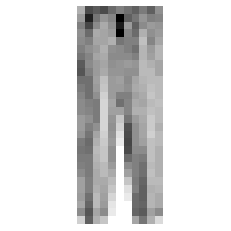

1

In [6]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[i,0]

## Activation functions (10%)

In [7]:
#TODO: Sigmoid activation function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

## Loss function (20%)
BCE Loss function captures the intuition that the neural network should pay a high penalty(Loss→∞) when the estimated probability, with respect to the training example’s label, is completely wrong. On the other hand, the Loss should equal zero(Loss=0) when the estimated probability, with respect to the training example’s label, is correct. Simply put, the BCE Loss should equal zero in only two instances:<br>
* if the example is positively labeled(y=1) the neural network model should be completely sure that the example belongs to the positive class i.e p̂=1.
* if the example is negatively labeled(y=0) the neural network model should be completely sure that the example does not belong to the positive class i.e p̂=0.

<b> When we work with a computer, there are very high values or very low values that it cannot handle and that could cause the system to crash. <br>In order to overcome the case where the function returns values that strive for infinity you will need to understand which range of values causes the logarithm to return inf \ -inf and handle this within the function. </b>

In [8]:
#TODO: Binary cross entropy
def log_loss(y_hat, y):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    # avoid numbers that are either too big or too small (to prevent inf result)
    min_value, max_value = 1e-7, 1 - 1e-7
    y_hat = np.clip(y_hat, min_value, max_value)
    return -(y * np.log(y_hat + min_value) + (1-y) * np.log(1-y_hat + 1e-7))

## NN Hyper Parameters

In [9]:
input_layer = X_train.shape[0] # 28X28 = 784
hidden_layer = 10
learning_rate = 0.3
epochs = 100

## Weight and Bias Initialization

In [10]:
W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)
b2 = np.zeros((1, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(10, 784)
(10, 1)
(1, 10)
(1, 1)


## Training (30%)

In [11]:
X = X_train
Y = Y_train
loss_list = []
epoch_list = []
numOfTraining = 12000 # Write the number of examples in your train set

for i in range(epochs):
  avg_epoch_loss = 0
  for j in range(numOfTraining):
    # TODO :  Forward propagation
    
    Z1 = np.matmul(W1,X[:,j]) + b1.T # DO NOT FORGET TO ADD THE BIAS
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1.T) + b2
    A2 = sigmoid(Z2)[0][0] 
    Yout = Y[j][0]

    # TODO: Compute loss
    loss = log_loss( A2, Yout)
    avg_epoch_loss = avg_epoch_loss + loss
    # m = Y.shape[1]

    # # TODO: Back propagation
    dZ2 = A2-Yout
    dW2 = dZ2 * A1 
    db2 = dZ2 
   
    dA1 = dZ2 * W2 
    dZ1 = dA1 * (A1 * (1 - A1))

    dW1 = np.matmul(dZ1.T, (X[:,j][...,np.newaxis]).T)
    db1 = (dZ1 * 1).T

    # TODO: Update weights
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

  avg_epoch_loss = avg_epoch_loss/numOfTraining
  loss_list.append(avg_epoch_loss)
  epoch_list.append(i)
  print("Epoch", i," Loss:", avg_epoch_loss)

Epoch 0  Loss: 0.07050448993742557
Epoch 1  Loss: 0.03713607576016006
Epoch 2  Loss: 0.03309508733828962
Epoch 3  Loss: 0.03092465382320434
Epoch 4  Loss: 0.033605057148619645
Epoch 5  Loss: 0.029059543766927008
Epoch 6  Loss: 0.02639174205608661
Epoch 7  Loss: 0.026572515391354155
Epoch 8  Loss: 0.03270782177583624
Epoch 9  Loss: 0.03498616838244049
Epoch 10  Loss: 0.025705003260289055
Epoch 11  Loss: 0.02404813750831588
Epoch 12  Loss: 0.021241330059322095
Epoch 13  Loss: 0.02317398206449837
Epoch 14  Loss: 0.021781187145138874
Epoch 15  Loss: 0.023466032083194477
Epoch 16  Loss: 0.02294818309394473
Epoch 17  Loss: 0.02467334578036731
Epoch 18  Loss: 0.023098464121530427
Epoch 19  Loss: 0.02434575371189102
Epoch 20  Loss: 0.02115123810745925
Epoch 21  Loss: 0.019281702894853765
Epoch 22  Loss: 0.018782267309896565
Epoch 23  Loss: 0.017765288243404967
Epoch 24  Loss: 0.02057877742895911
Epoch 25  Loss: 0.015715379771457344
Epoch 26  Loss: 0.017846910410729222
Epoch 27  Loss: 0.0163909

### Loss Visualization

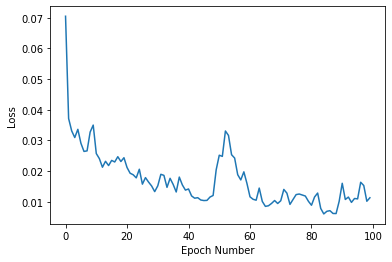

In [12]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

## Results

### Test your performance (30%)

In [13]:
#TODO: Forward batch of examples
X = X_test
Y = Y_test

Z1 = np.matmul(W1, X_test) + b1
A1 = np.tanh(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)


predictions = np.zeros((1,Y.shape[0]))
labels = np.zeros((1,Y.shape[0]))

# Check your predictions against the test's labels
for i in range(Y.shape[0]):
  if (A2[0,i] > 0.5): 
    predictions[0,i] = 1
  labels[0,i] = Y[i,0]


# Print the confusion matrix In order to test your performance
print(confusion_matrix(predictions.T, labels.T))

[[1024    1]
 [   5  970]]


### Visualize the results

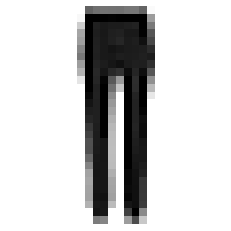

Real= 1 Predicted= 0.9996933544605434


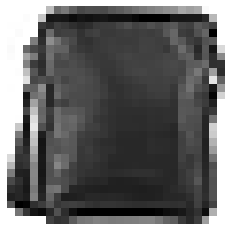

Real= 0 Predicted= 0.00042262468443661554


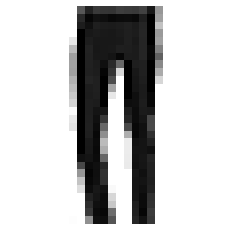

Real= 1 Predicted= 0.999693353474323


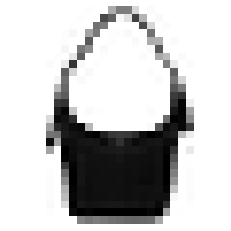

Real= 0 Predicted= 0.00042217562876597684


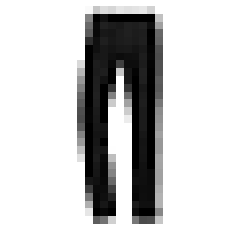

Real= 1 Predicted= 0.9996933534747859


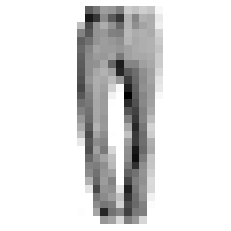

Real= 1 Predicted= 0.9996933541113361


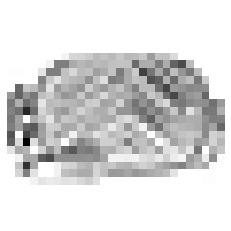

Real= 0 Predicted= 0.0004226246573175671


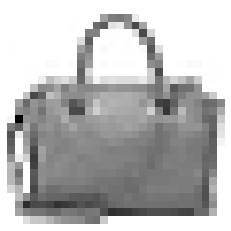

Real= 0 Predicted= 0.0004226246844366061


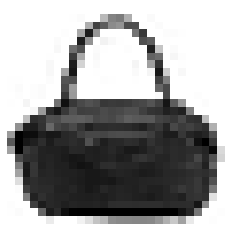

Real= 0 Predicted= 0.00042262468443661554


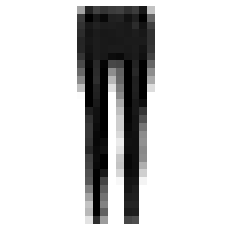

Real= 1 Predicted= 0.9996933731538837


In [14]:
#TODO: SHOW VISUALLY RESULTS ON 10 TEST EXAMPLES
%matplotlib inline
from numpy import random

def show_item(item):
  """
  @param item: index of an item to display
  shows a picture and the prediction made for it
  """
  plt.imshow(X_test[:,item].reshape(28,28), cmap = matplotlib.cm.binary)
  plt.axis("off")
  plt.show()
  Y_test[item,0]

  Z1 = np.matmul(W1,X_test[:,item]) + b1.T
  A1 = sigmoid(Z1)
  Z2 = np.matmul(W2,A1.T) + b2
  A2 = sigmoid(Z2)[0][0]
  Yout = Y[item,0]

  print("Real=", Y_test[i,0], "Predicted=",A2)

# show 10 examples
for x in range(10):
  i = random.randint(2000)
  show_item(i)